## Исследование данных о российском кинопрокате



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 300

Получим данные

In [2]:
# Прочитаем данны в датасет
df_mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Посмотрим какие данных хранятся в df_mkrf_movies

In [3]:
df_mkrf_movies.head() # выведем первые 5

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_mkrf_movies.info()# посмотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [5]:
df_mkrf_shows.info()# посмотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
print(f'Кол-во уникальных значений в df_mkrf_movies {df_mkrf_movies.puNumber.nunique()}, а всего {df_mkrf_movies.puNumber.count()}')
print(f'Кол-во уникальных значений в df_mkrf_shows  {df_mkrf_shows.puNumber.nunique()}, а всего {df_mkrf_shows.puNumber.count()}')

Кол-во уникальных значений в df_mkrf_movies 7484, а всего 7486
Кол-во уникальных значений в df_mkrf_shows  3158, а всего 3158


Видим, что есть прокатные удостоверния встречающееся несколько раза. Проверим.

In [7]:
pd.DataFrame(df_mkrf_movies.puNumber.value_counts()).head()

,puNumber
221054410,2
221154310,2
126004613,1
221002015,1
121005016,1


Посмотрим что это за фильмы

In [8]:
df_mkrf_movies[(df_mkrf_movies.puNumber == '221054410') | (df_mkrf_movies.puNumber == '221154310')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.8,"комедия,криминал"


Посмотрим есть ли данные по этим удостоверениям в файле `df_mkrf_shows`, _сразу напишу, что нет_.

In [9]:
df_mkrf_shows[(df_mkrf_shows.puNumber == 221054410) | (df_mkrf_shows.puNumber == 221154310)]

,puNumber,box_office


In [10]:
df_mkrf_movies.drop_duplicates(subset='puNumber', keep=False, inplace=True)

In [11]:
# Проверим:, всё чисто.
pd.DataFrame(df_mkrf_movies.puNumber.value_counts()).head()

,puNumber
126004613,1
126000412,1
121022515,1
111001010,1
111003115,1


In [12]:
# Постморим у кого фильма НЕТ прокатного удостоверния
df_mkrf_movies.loc[df_mkrf_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN


Удалю его т.к. восстановить номер прокатного удостовернеия я не знаю как и спросить тоже не знаю у кого.

In [13]:
# Удалим фильм без прокатного удостовернеия
df_mkrf_movies.drop(1797,axis=0, inplace=True)
df_mkrf_movies.reset_index(drop = True, inplace=True)

In [14]:
# Зададим тип данных 'int64'
df_mkrf_movies['puNumber'] = df_mkrf_movies['puNumber'].astype('int64')
df_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7481 entries, 0 to 7480
Data columns (total 15 columns):
title                    7481 non-null object
puNumber                 7481 non-null int64
show_start_date          7481 non-null object
type                     7481 non-null object
film_studio              7463 non-null object
production_country       7479 non-null object
director                 7472 non-null object
producer                 6913 non-null object
age_restriction          7481 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6515 non-null object
genres                   6506 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 876.8+ KB


__Объединим датасеты__

In [15]:
df_m = pd.merge(df_mkrf_movies, df_mkrf_shows, how='left', on='puNumber').reset_index(drop = True)
# Посмотрим, что вышло
df_m.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Посмотрим типы данных в датафрейме `df_mkrf_movies`


* __puNumber__ - приведен к `int64` <span style="color:green">верно</span>
* __show_start_date__ - имеет тип `object` хотя там хранятся даты нужно преобразовать к `datetime64[ns]`
* __film_studio__ - имеет тип `object` <span style="color:green">верно</span>
* __production_country__ - имеет тип `object` <span style="color:green">верно</span>
* __director__ - имеет тип `object` <span style="color:green">верно</span>
* __producer__ - имеет тип `object` <span style="color:green">верно</span>
* __age_restriction__ - имеет тип `object` <span style="color:green">верно</span>
* __refundable_support__ - имеет тип `float64` <span style="color:green">верно</span>
* __nonrefundable_support__ - имеет тип `float64` <span style="color:green">верно</span>
* __budget__ - имеет тип `float64` <span style="color:green">верно</span>
* __financing_source__ - имеет тип `object` <span style="color:green">верно</span>
* __ratings__ - имеет тип `object` хотя там хранятся десятичные числа нужно преобразовать к `float64` _Забегая вперед я создам новый столбце `Nratings`_
* __genres__ - имеет тип `object` <span style="color:green">верно</span>

Подозрение вызвали следующие столбцы `show_start_date` и `ratings`, преобразуем их.

Преобразуем столбец с датой `show_start_date` к типу `datetime64[ns]`

In [16]:
df_m['show_start_date'] = pd.to_datetime(df_m['show_start_date'],
                                         format='%Y-%m-%dT%H:%M:%S.%fZ')

In [17]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7481 entries, 0 to 7480
Data columns (total 16 columns):
title                    7481 non-null object
puNumber                 7481 non-null int64
show_start_date          7481 non-null datetime64[ns]
type                     7481 non-null object
film_studio              7463 non-null object
production_country       7479 non-null object
director                 7472 non-null object
producer                 6913 non-null object
age_restriction          7481 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6515 non-null object
genres                   6506 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 935.2+ KB


Преобразование прошло верно

Посомтрим все уникальные значение в столбце `ratings` и увидим значения с процентами % надо что то с ними делать.

In [18]:
df_m['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [19]:
#pd.DataFrame(df_m.ratings.value_counts())
count_proc_in_raitings = df_m[df_m['ratings'].str.contains('%', na=False)]['ratings'].count()
count_float_in_raitings = df_m[~df_m['ratings'].str.contains('%', na=False)]['ratings'].count()
print(f'Количесво процентных оценок: {count_proc_in_raitings}\nКоличесво десятичных оценок: {count_float_in_raitings}')

Количесво процентных оценок: 29
Количесво десятичных оценок: 6486


Очевидно, что процентных оценок меньше чем десятичных. Приведем их к десятичному виду, чтобы все рейтинги были одинаковыми. Для этого поделим рейтинг на 10, чтобы оценки по шкале от 1 до 100 привести к виду 1-10.

Есть вероятность, что это просто старая система оценок или данные вообще не рейтинг, но я решил, что это рейтинг и они будут приведены к десятичному виду.

In [20]:
def poc_to_fl(row):
    column = 'ratings'
    result = row[column]
    if '%' in str(row[column]):
        result = float(row.loc[column].replace('%','')) / 10
    return float(result)
df_m['Nratings'] = df_m.apply(poc_to_fl, axis=1)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7481 entries, 0 to 7480
Data columns (total 17 columns):
title                    7481 non-null object
puNumber                 7481 non-null int64
show_start_date          7481 non-null datetime64[ns]
type                     7481 non-null object
film_studio              7463 non-null object
production_country       7479 non-null object
director                 7472 non-null object
producer                 6913 non-null object
age_restriction          7481 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6515 non-null object
genres                   6506 non-null object
box_office               3158 non-null float64
Nratings                 6515 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(10)
memory usage: 993.7+ KB


Типы данных привели к нужным типам, завел новый столбец `Nratings` для хранения `ratings`.

Поищу подозрительные данные, выведя все уникальные значения и просто просмотрю их.

In [21]:
# ищу подозрительные данные
# просто выведу все значения
columns_in_df = df_m.columns
for col in columns_in_df:
    print(f'----- {col} -----')
    for item in df_m[col].unique():
        print(item)

----- title -----
Открытый простор
Особо важное задание
Особо опасен
Остановился поезд
Любовь и голуби
Любовь и сигареты
Отпетые мошенники.
Отпуск за свой счет
Превосходство Борна /По одноименной новелле Роберта Ладлэма/
Ответный ход
Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/
Преданный садовник
Отель /По мотивам пьесы Джона Уэбстера/
Председатель
Осенний марафон
Осень
Неподдающиеся
Неподсуден
Незабываемый 1919-й год
Незаконченная жизнь
Операция "Ы" и другие приключения Шурика
Неизвестные страницы из жизни разведчика
Неисправимый лгун
Призрак замка Моррисвиль
Оружейный барон
Отставной козы барабанщик
Паршивая овца
Плюмбум, или Опасная игра
Первое свидание
Охота на лис.
Пиноккио 3000
Перелом
Мисс Поттер
Миссис Хендерсон представляет
Планета КА-ПЭКС /По мотивам романа Джин Бруэр/
Молчи в тряпочку
Мужики!..
Автомобиль, скрипка и собака Клякса
Алекс и Эмма
Мой лучший любовник
Мемуары гейши (по роману Артура Голдена)
Адъютант его превосходительства
Без

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [22]:
df_m.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7149
nonrefundable_support    7149
budget                   7149
financing_source         7149
ratings                   966
genres                    975
box_office               4323
Nratings                  966
dtype: int64

__Пропуски и как их обработать__.
Найдены следующие пустые столбцы:
* __film_studio__ - студия-производитель можно интернете поискать или написать `'not_data'`;
* __production_country__ - страна-производитель можно в интернете поискать или написать `'not_data'`;
* __director__ - режиссёр можно в интернете поискать или написать `'not_data'`;
* __producer__ - продюсер можно в интернете поискать или написать `'not_data'`;
* __genres__ - жанр фильма можно в интернете поискать или написать `'not_data'`;
* __box_office__ - сборы в рублях можно в интернете поискать или написать `'not_data'`;
* __refundable_support__ - объём возвратных средств государственной поддержки ну если не написано значит неизвесно <span style="color:blue">оставлю пустым изменть не буду</span>;
* __nonrefundable_support__ - объём невозвратных средств государственной поддержки ну если не написано значит неизвесно <span style="color:blue">оставлю пустым изменть не буду</span>;
* __budget__ - общий бюджет фильма ну если не написано значит неизвесно <span style="color:blue">оставлю пустым изменть не буду</span>;
* __financing_source__ - источник государственного финансирования ну если не написано значит неизвесно <span style="color:blue">оставлю пустым изменть не буду</span>;

Посмотрим где меньше всего пропущеных значений.

In [23]:
# Посмотрим какие фильмы без страны производителя
df_m.loc[df_m.production_country.isna()]['title']

3185    Детский юмористический киножурнал "Ералаш. Ну ...
4440                             Мульт личности. Выпуск 5
Name: title, dtype: object

In [24]:
# Гуглим название фильмов получам страну Россию, присваиваем
df_m.loc[df_m.production_country.isna(), 'production_country'] = 'Россия'

Для заполнения столбцов `film_studio`, `director`, `producer`, `genres`, `financing_source` нужно будет писать парсер кинопоиска или его аналогов, а т.к. это долго просто заполним значениями по умолчанию `'not_data'`.
Нельзя просто случайно заполнить имя продюссера или редиссера.

Столбцы `box_office`, `refundable_support`, `nonrefundable_support`, `budget`, `Nratings` оставлю c спропусками, т.к. тут тоже нужно знать точную сумму и заполнить средними не выйдет по причине разных бюджетов, помощи от государства и сборов зависящих больше от ситуации на рынке.

In [25]:
df_m.film_studio.fillna('not_data', inplace=True)
df_m.director.fillna('not_data', inplace=True)
df_m.producer.fillna('not_data', inplace=True)
df_m.age_restriction.fillna('not_data', inplace=True)
df_m.genres.fillna('not_data', inplace=True)
df_m.financing_source.fillna('not_data', inplace=True)
# Посмотрим, что в итоге выйдет
df_m.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7149
nonrefundable_support    7149
budget                   7149
financing_source            0
ratings                   966
genres                      0
box_office               4323
Nratings                  966
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Просто удалим дубликаты.

In [26]:
count_row_dup = len(df_m)
df_m.drop_duplicates(keep='last', inplace=False)
count_row_no_dup = len(df_m)
print(f'Строк до удаления дублей: {count_row_dup},\nСтрок после удаленя дублей: {count_row_no_dup}.')

Строк до удаления дублей: 7481,
Строк после удаленя дублей: 7481.


In [27]:
pd.DataFrame(df_m.title.value_counts()).head(15)

,title
День святого Валентина_,5
Робин Гуд (Robin Hood),4
Знакомство с Факерами 2.,4
Не брать живым /По книге Раджива Чандрасекарана/,4
Шерлок Холмс,4
Секс в большом городе 2,4
Кошмар на улице Вязов /Фильм ужасов/,4
Химера,4
Дитя тьмы,4
Красавчик-2,4


Посмотрим в подсказку и устраним дубли из названий ' Художественный' и ' Анимационный'

In [28]:
df_m['type'] = df_m['type'].str.strip()
# Посмотрим ушли дубли или нет
df_m['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [29]:
df_m[df_m.budget > 0]
# для фильмов с гос. финансированием указан бюджет
# для остальных нет стоилобы спросить, что это за бюджет.

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,Nratings
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.1,"драма,мелодрама",365353.60,8.10
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,not_data,28140.00,nan
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.3,"комедия,фантастика",19957031.50,5.30
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.2,драма,55917.50,4.20
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.4,драма,232100.00,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.0,"история,биография,драма",717703185.53,6.00
7461,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235.00,6.70
7469,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.7,"фантастика,боевик",nan,5.70
7471,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.9,драма,nan,5.90


In [30]:
print(f'Данных удовлетворяющих условию: {len(df_m[df_m.budget > 0])}\nДанных не удовлетворяющих условию: {len(df_m[df_m.budget <= 0])}\nДанных c пропусками: {df_m.budget.isna().sum()}')

Данных удовлетворяющих условию: 315
Данных не удовлетворяющих условию: 17
Данных c пропусками: 7149


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [31]:
df_m['year'] = df_m['show_start_date'].dt.year

In [32]:
df_m['Ndirector'] = 'not_data'
df_m['Ngenres'] = 'not_data'
def dir_and_gebre(row):
    row['Ndirector'] = row['director'].split(',')[0]
    row['Ngenres'] = row['genres'].split(',')[0]
    return row
df_m = df_m.apply(dir_and_gebre, axis=1)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [33]:
df_m['state_share'] = (df_m['refundable_support'] + df_m['nonrefundable_support']) / df_m['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
city,981,622,593,630,806,705,818,505,891,930


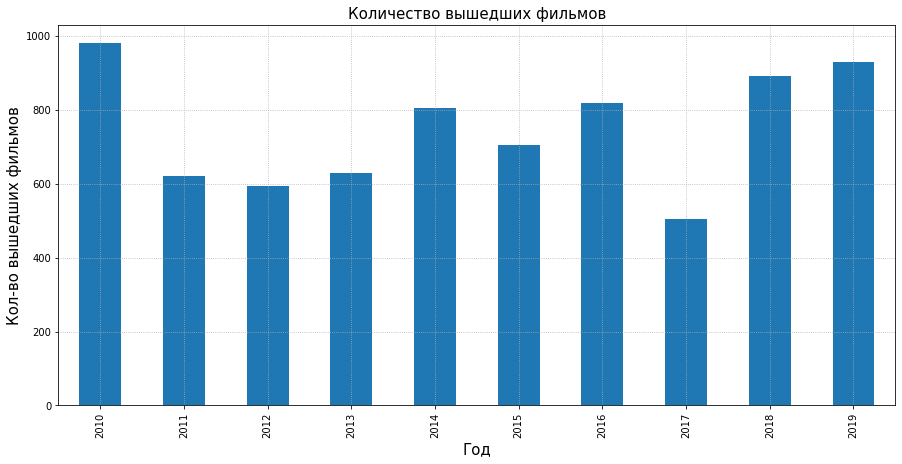

In [34]:
# Количесво фильмов вышедших по годам
group_year_1 = df_m.groupby('year')['title'].count()
group_year_1.plot(x = group_year_1.index, kind = 'bar', figsize=(15,7), legend=False)
plt.title('Количество вышедших фильмов', fontsize=15)
plt.ylabel('Кол-во вышедших фильмов', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.grid(linestyle=':')
group_year_1.to_frame(name='city').T

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
city,101,109,123,179,273,462,525,357,475,530


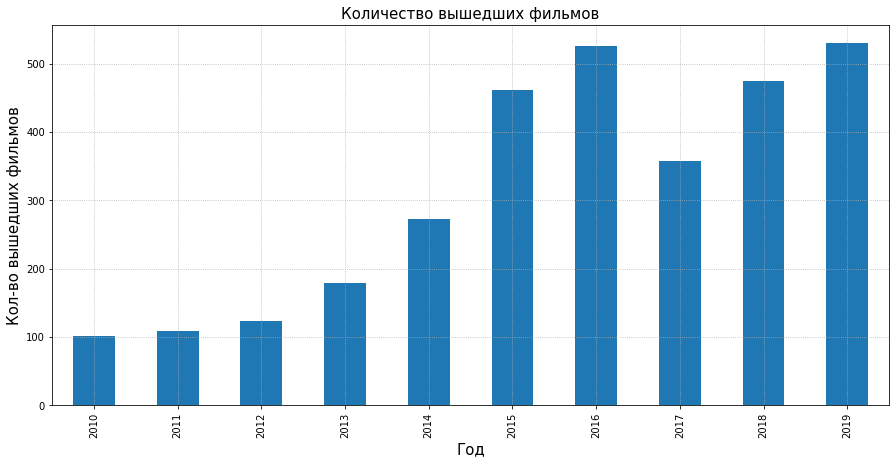

In [35]:
# Посомтрим количесво фильмов известными доходами в прокате
group_year_2 = df_m[df_m['box_office']>0].groupby('year')['title'].count()
group_year_2.plot(x = group_year_2.index, kind = 'bar', figsize=(15,7), legend=False)
plt.title('Количество вышедших фильмов', fontsize=15)
plt.ylabel('Кол-во вышедших фильмов', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.grid(linestyle=':')
group_year_2.to_frame(name='city').T

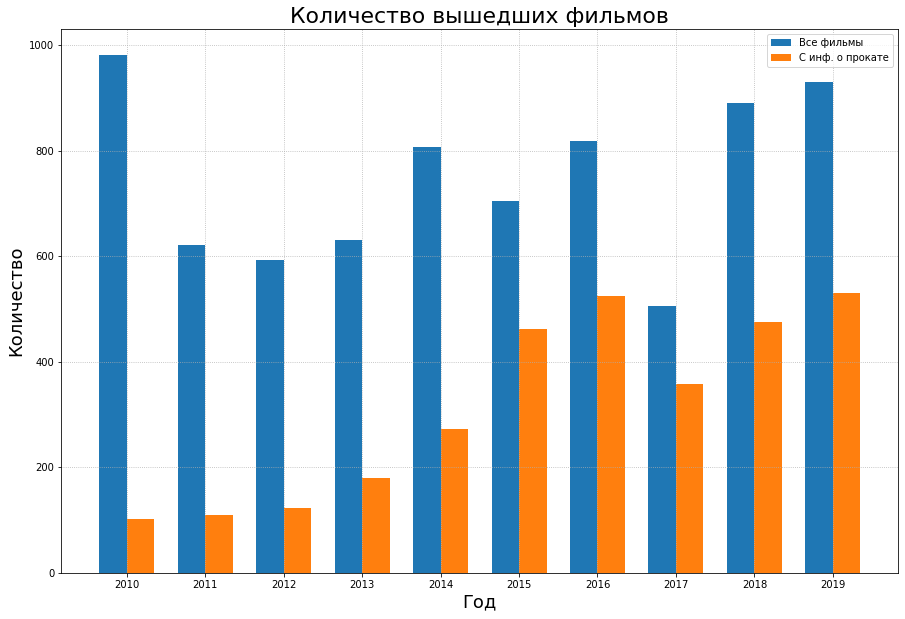

In [36]:
# Сравним на одном графике эти данные
bar_width = 0.35
plt.figure(figsize=(15,10))
plt.title('Количество вышедших фильмов', fontsize=22)
rects1 = plt.bar(group_year_1.index, group_year_1.values, bar_width, label='Все фильмы')
rects2 = plt.bar(group_year_2.index + bar_width, group_year_2.values, bar_width, label='С инф. о прокате')
plt.xticks(group_year_1.index + bar_width / 2, group_year_1.index)
plt.grid(linestyle=':')
plt.xlabel('Год', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.legend()

In [37]:
df_join_film = group_year_1.to_frame(name='film').join(group_year_2.to_frame(name='film'),lsuffix='_all', rsuffix='_inf')
df_join_film['proc'] = (df_join_film['film_inf'] / df_join_film['film_all'])
df_join_film.style.format({'proc': "{:.2%}"})

,film_all,film_inf,proc
year,,,
2010,981,101,10.30%
2011,622,109,17.52%
2012,593,123,20.74%
2013,630,179,28.41%
2014,806,273,33.87%
2015,705,462,65.53%
2016,818,525,64.18%
2017,505,357,70.69%
2018,891,475,53.31%


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [38]:
# df_m[df_m['box_office']>0]
max_year = df_m.groupby('year')['box_office'].sum().reset_index().sort_values(by = 'box_office', ascending=False)
my_sum = max_year['box_office'].max()
my_year = max_year[max_year['box_office'] == max_year['box_office'].max()]['year'].values[0]
print('Сумма сборов была максимальной в {} и составила {}'.format(my_year, my_sum))
my_sum = max_year['box_office'].min()
my_year = max_year[max_year['box_office'] == max_year['box_office'].min()]['year'].values[0]
print('Сумма сборов была минимальной в {} и составила {}'.format(my_year, my_sum))

Сумма сборов была максимальной в 2018 и составила 49668403134.31999
Сумма сборов была минимальной в 2010 и составила 2428654.0


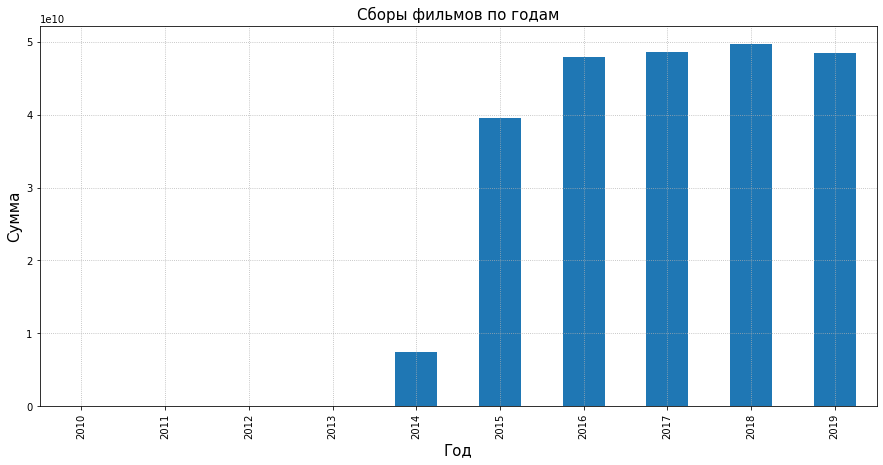

In [39]:
box_office_sum = df_m.groupby('year')['box_office'].sum()
box_office_sum.plot(kind = 'bar', figsize=(15,7), legend=False)
plt.title('Сборы фильмов по годам', fontsize=15)
plt.ylabel('Сумма', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.grid(linestyle=':')

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [40]:
pd.pivot_table(df_m[df_m['box_office']>0], index='year', values='box_office', aggfunc = {'box_office':['mean','median']})

,mean,median
year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [41]:
my_age_restriction = pd.pivot_table(df_m[(df_m['box_office']>0) & (df_m['year']>2014) & (df_m['year']<2020)], index=['year', 'age_restriction'], values='box_office', aggfunc = {'box_office':['sum']})
my_age_restriction.sort_values('sum').sort_index(level = 0, sort_remaining=False, ascending=False)
# да влияет, каждый год рейтинг фильма 0+ зарабатывает меньше денег 

sum
year age_restriction                                      
2019 «6+» - для детей старше 6 лет          12852548650.86
     «16+» - для детей старше 16 лет        12753418984.60
     «12+» - для детей старше 12 лет        12680198773.67
     «18+» - запрещено для детей            10121796303.64
     «0+» - для любой зрительской аудитории    17746066.82
2018 «16+» - для детей старше 16 лет        16503602346.96
     «12+» - для детей старше 12 лет        14267291660.69
     «6+» - для детей старше 6 лет          10104974623.41
     «18+» - запрещено для детей             8760085501.15
     «0+» - для любой зрительской аудитории    32449002.11
2017 «16+» - для детей старше 16 лет        18745042900.06
     «6+» - для детей старше 6 лет          12086142145.76
     «18+» - запрещено для детей             9651495581.02
     «12+» - для детей старше 12 лет         7851427660.67
     «0+» - для любой зрительской аудитории   229598930.00
2016 «16+» - для детей старше 16 лет        16664548541.74
     «12+» - для детей старше 12 лет        12204446524.39
     «6+» - для детей старше 6 лет          12053146008.24
     «18+» - запрещено для детей             6793929818.87
     «0+» - для любой зрительской аудитории   150228848.67
2015 «12+» - для детей старше 12 лет        13616082008.91
     «16+» - для детей старше 16 лет        11368120870.27
     «6+» - для детей старше 6 лет           8701799371.41
     «18+» - запрещено для детей             5432308367.44
     «0+» - для любой зрительской аудитории   379054578.37

In [42]:
my_age_restriction_3 = pd.pivot_table(df_m[(df_m['box_office']>0) & (df_m['year']>2014) & (df_m['year']<2020)], index=['year', 'age_restriction'], values='box_office', aggfunc = {'box_office':['mean']})
my_age_restriction_3.sort_values('mean').sort_index(level = 0, sort_remaining=False, ascending=False)

mean
year age_restriction                                    
2019 «6+» - для детей старше 6 лет          158673440.13
     «12+» - для детей старше 12 лет        149178809.10
     «16+» - для детей старше 16 лет         71648421.26
     «18+» - запрещено для детей             55310362.31
     «0+» - для любой зрительской аудитории   5915355.61
2018 «12+» - для детей старше 12 лет        212944651.65
     «6+» - для детей старше 6 лет          148602567.99
     «16+» - для детей старше 16 лет        105792322.74
     «18+» - запрещено для детей             48939025.15
     «0+» - для любой зрительской аудитории   6489800.42
2017 «6+» - для детей старше 6 лет          268580936.57
     «12+» - для детей старше 12 лет        191498235.63
     «16+» - для детей старше 16 лет        154917709.92
     «0+» - для любой зрительской аудитории  76532976.67
     «18+» - запрещено для детей             65656432.52
2016 «6+» - для детей старше 6 лет          172187800.12
     «12+» - для детей старше 12 лет        148834713.71
     «16+» - для детей старше 16 лет         92069328.96
     «18+» - запрещено для детей             44992912.71
     «0+» - для любой зрительской аудитории   3664118.26
2015 «12+» - для детей старше 12 лет        189112250.12
     «6+» - для детей старше 6 лет          164184893.80
     «16+» - для детей старше 16 лет         68072580.06
     «18+» - запрещено для детей             41153851.27
     «0+» - для любой зрительской аудитории   9975120.48

In [43]:
# больше всего денег зарабатывает аудитория "16+"
#my_age_restriction.sort_values(by='sum')
my_age_restriction_2 = pd.pivot_table(df_m[(df_m['box_office']>0) & (df_m['year']>2014) & (df_m['year']<2020)], index=['age_restriction'], values='box_office', aggfunc = {'box_office':['sum']})
my_age_restriction_2.sort_values('sum', ascending=False)

,sum
age_restriction,
«16+» - для детей старше 16 лет,76034733643.63
«12+» - для детей старше 12 лет,60619446628.33
«6+» - для детей старше 6 лет,55798610799.68
«18+» - запрещено для детей,40759615572.12
«0+» - для любой зрительской аудитории,809077425.97


In [44]:
# В среденем самые кассовые фильмы 6+ ну дети то сами до кино не дойдут их должны родители приводить
my_age_restriction_4 = pd.pivot_table(df_m[(df_m['box_office']>0) & (df_m['year']>2014) & (df_m['year']<2020)], index=['age_restriction'], values='box_office', aggfunc = {'box_office':['mean']})
my_age_restriction_4.sort_values('mean', ascending=False)

,mean
age_restriction,
«6+» - для детей старше 6 лет,176020854.26
«12+» - для детей старше 12 лет,174695811.61
«16+» - для детей старше 16 лет,94688335.80
«18+» - запрещено для детей,51464161.08
«0+» - для любой зрительской аудитории,8989749.18


In [45]:
# Картина меняется, но скрее всего это связано с популярными жанрами и франшизами в этом году
# которы и приносили основную кассу

In [46]:
import seaborn as sns

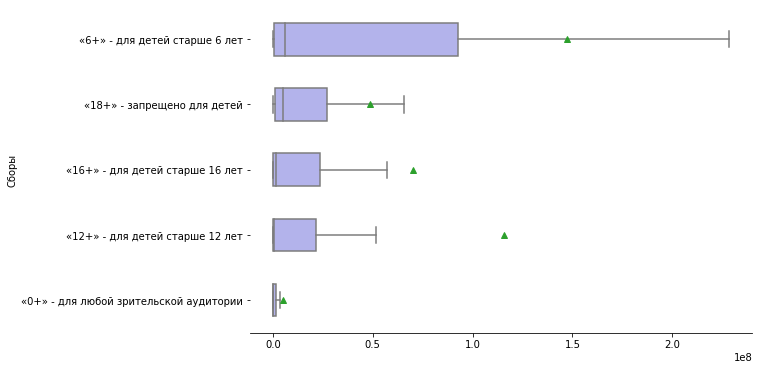

In [47]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.boxplot(data=df_m, y='age_restriction', x='box_office', showfliers=False, showmeans=True,
           order=df_m.groupby('age_restriction', as_index=False)\
                    .agg({'box_office':'median'}).sort_values(by='box_office', ascending=False)\
                    ['age_restriction'].to_list(), color='#A9A9F5', width=0.5, orient='h')
sns.despine(left=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('Сборы');

<hr style="border: 2px solid orange;" />

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [48]:
# Создадим отдельный датасет с фильмами у кого указан источник государственного финансирования
# сборы box_office > -1

government_support = df_m[(df_m['financing_source']!='not_data') & (df_m['box_office']>0) & (df_m['budget']>0)].copy()
government_support.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office,Nratings,year,state_share
count,301.00,301.00,301.00,301.00,301.00,287.00,301.00,301.00
mean,111248541.56,11677740.86,47854481.22,134837767.97,130698257.71,6.04,2016.67,0.52
std,812219.83,25059737.60,57559890.65,189140741.19,339190287.30,1.17,1.63,0.17
min,111000115.00,0.00,0.00,14462464.00,1550.00,1.00,2013.00,0.04
25%,111004718.00,0.00,25000000.00,46160000.00,1067649.00,5.40,2015.00,0.37
50%,111009916.00,0.00,30000000.00,75000135.00,12748398.30,6.20,2016.00,0.59
75%,111016615.00,15000000.00,40000000.00,154245687.00,103134751.12,6.70,2018.00,0.66
max,114010018.00,180000000.00,400000000.00,2305074303.00,3073568690.79,9.40,2019.00,0.78


In [49]:
# Посмотрим кто финансирует фильмы, кто сколько выдал денег и на что
pd.pivot_table(government_support,
               index=['financing_source', 'type', 'production_country'],
               aggfunc = {'box_office':['sum', 'mean'],
                         'refundable_support':['sum', 'mean'],
                          'nonrefundable_support':['sum', 'mean'],
                         },
              )

box_office  \
                                                                                                   mean   
financing_source                 type           production_country                                        
Министерство культуры            Анимационный   Россия                                      15078858.60   
                                 Художественный Россия                                      31518740.48   
                                                Россия, Армения                              3363230.23   
                                                Россия, Германия                            51704986.00   
                                                Россия, Германия, Казахстан, Польша, Китай   2446886.00   
                                                Россия, Италия                              54243202.71   
                                                Россия, Латвия, Чешская Республика          21363842.53   
                                                Россия, Сербия                             307650644.24   
                                                Россия, Украина, Польша                      4568857.30   
                                                Россия-Словакия-Чехия                         288019.50   
                                                Россия-Украина                             401804461.90   
Министерство культуры, Фонд кино Художественный Россия                                      41591006.46   
                                                Россия, Италия                                144040.00   
                                                Россия, Франция, Латвия                      4731239.50   
Фонд кино                        Анимационный   Россия                                     218686807.33   
                                 Художественный Россия                                     270611408.59   
                                                Россия, Германия                              739938.00   
                                                Россия, Германия, Великобритания             1307120.01   
                                                Россия-Китай                               333597059.59   

                                                                                                           \
                                                                                                      sum   
financing_source                 type           production_country                                          
Министерство культуры            Анимационный   Россия                                        15078858.60   
                                 Художественный Россия                                      4444142407.49   
                                                Россия, Армения                                3363230.23   
                                                Россия, Германия                              51704986.00   
                                                Россия, Германия, Казахстан, Польша, Китай     2446886.00   
                                                Россия, Италия                                54243202.71   
                                                Россия, Латвия, Чешская Республика            21363842.53   
                                                Россия, Сербия                               307650644.24   
                                                Россия, Украина, Польша                        4568857.30   
                                                Россия-Словакия-Чехия                           288019.50   
                                                Россия-Украина                               401804461.90   
Министерство культуры, Фонд кино Художественный Россия                                       790229122.66   
                                                Россия, Италия                                  144040.

In [50]:
my_data = pd.pivot_table(government_support,
                         index=['financing_source'],
                         aggfunc = {'box_office':['sum', 'mean'],
                                    'refundable_support':['sum', 'mean'],
                                    'nonrefundable_support':['sum', 'mean'],
                                   },
                        )
# Видно, что Министерство культуры выдаёт деньги на безвозмездной основе
# А фонд кино выдаёт деньги частями, чатсь на возвратной, часть на безвозвратной основе
# Из таблицы видно, что деньги не очень то и отбиваются построим график.

In [51]:
my_data

box_office                 \
                                         mean            sum   
financing_source                                               
Министерство культуры             35143413.22  5306655396.50   
Министерство культуры, Фонд кино  37862114.39   795104402.16   
Фонд кино                        257662137.76 33238415770.89   

                                 nonrefundable_support                \
                                                  mean           sum   
financing_source                                                       
Министерство культуры                      30073781.46 4541141000.00   
Министерство культуры, Фонд кино           39853874.00  836931354.00   
Фонд кино                                  69969972.81 9026126493.00   

                                 refundable_support                
                                               mean           sum  
financing_source                                                   
Министерство культуры                          0.00          0.00  
Министерство культуры, Фонд кино        15500000.00  325500000.00  
Фонд кино                               24724806.20 3189500000.00

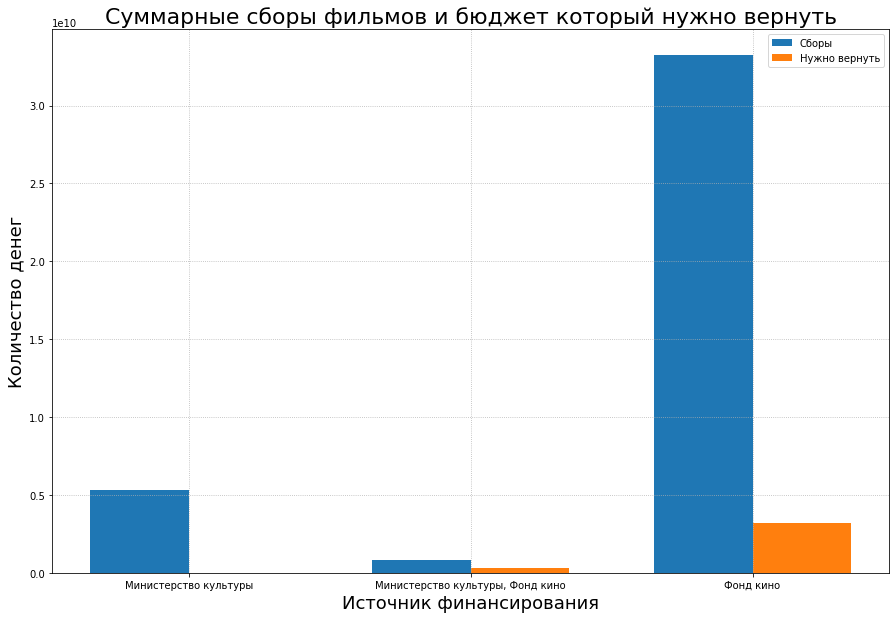

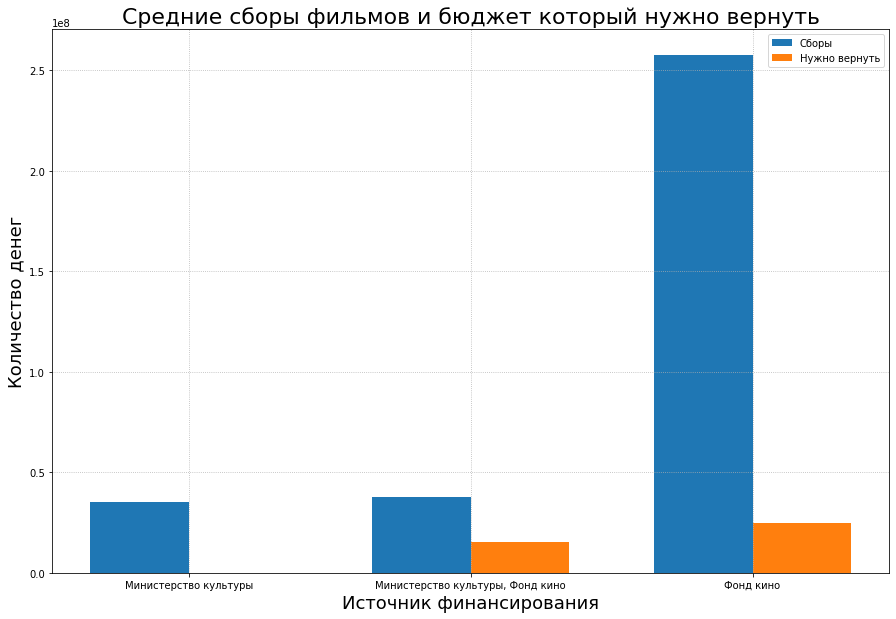

In [52]:
# plt.xticks(group_year_1.index + bar_width / 2, group_year_1.index)

my_data['refundable_support']['sum']
pos = pd.Series([0,1,2])

#rects1 = plt.bar(pos, my_data['box_office']['sum'], bar_width, label='Сборы')
#rects2 = plt.bar(pos + bar_width, my_data['refundable_support']['sum'], bar_width, label='Нужно вернуть')

bar_width = 0.35
plt.figure(figsize=(15,10))
plt.title('Суммарные сборы фильмов и бюджет который нужно вернуть', fontsize=22)
rects1 = plt.bar(pos.values, my_data['box_office']['sum'], bar_width, label='Сборы')
rects2 = plt.bar(pos.values + bar_width, my_data['refundable_support']['sum'], bar_width, label='Нужно вернуть')
plt.xticks(pos.values + bar_width / 2, my_data.index)
plt.grid(linestyle=':')
plt.xlabel('Источник финансирования', fontsize=18)
plt.ylabel('Количество денег', fontsize=18)
plt.legend()

plt.figure(figsize=(15,10))
plt.title('Средние сборы фильмов и бюджет который нужно вернуть', fontsize=22)
rects1 = plt.bar(pos.values, my_data['box_office']['mean'], bar_width, label='Сборы')
rects2 = plt.bar(pos.values + bar_width, my_data['refundable_support']['mean'], bar_width, label='Нужно вернуть')
plt.xticks(pos.values + bar_width / 2, my_data.index)
plt.grid(linestyle=':')
plt.xlabel('Источник финансирования', fontsize=18)
plt.ylabel('Количество денег', fontsize=18)
plt.legend()
# на графике видно, что возвратные деньги скорее всего возвращают

In [53]:
# Посмотрим какие режиссеры приносит больше всего денег после вычета возвратных средств
my_data_2 = pd.pivot_table(government_support,
                         index=['director'],
                         aggfunc = {'box_office':'sum',
                                    'refundable_support':'sum',
                                    'title':'count'
                                   },
                        )
my_data_2 = my_data_2[my_data_2['refundable_support']>0]
my_data_2['profit'] = my_data_2['box_office'] - my_data_2['refundable_support']
my_data_2.sort_values(by='profit', ascending=False).head()

,box_office,refundable_support,title,profit
director,,,,
К.Шипенко,3827772217.79,25000000.00,3,3802772217.79
Д.Дьяченко,2404898634.12,171000000.00,4,2233898634.12
А.Сидоров,2271754004.52,60000000.00,1,2211754004.52
О.Трофим,1445731797.89,25000000.00,1,1420731797.89
Н.Лебедев,1402255390.00,50000000.00,1,1352255390.00


In [54]:
# Посомтрим кому чаще дают деньги на кино
my_data_2.sort_values(by='title', ascending=False).head()

,box_office,refundable_support,title,profit
director,,,,
Р.Давлетьяров,279305900.94,65000000.00,4,214305900.94
Д.Дьяченко,2404898634.12,171000000.00,4,2233898634.12
С.Андреасян,910430198.34,65000000.00,4,845430198.34
С.Мокрицкий,605964428.95,40000000.00,3,565964428.95
А.Аксененко,212728819.60,25000000.00,3,187728819.60


In [55]:
# Посмотрим какой тип фильмов приносит больше всего денег после вычета возвратных средств
my_data_3 = pd.pivot_table(government_support,
                         index=['type'],
                         aggfunc = {'box_office':'sum',
                                    'refundable_support':'sum'
                                   },
                          )
my_data_3 = my_data_3[my_data_3['refundable_support']>0]
my_data_3['profit'] = my_data_3['box_office'] - my_data_3['refundable_support']
my_data_3.sort_values(by='profit', ascending=False).head()

,box_office,refundable_support,profit
type,,,
Художественный,34295300142.25,2775000000.00,31520300142.25
Анимационный,5044875427.30,740000000.00,4304875427.30


In [56]:
# Посмотрим какие режиссеры приносит больше всего денег после вычета возвратных средств
my_data_4 = pd.pivot_table(government_support,
                         index=['film_studio'],
                         aggfunc = {'box_office':'sum',
                                    'refundable_support':'sum',
                                    'title':'count'
                                   },
                          )
my_data_4 = my_data_4[my_data_4['refundable_support']>0]
my_data_4['profit'] = my_data_4['box_office'] - my_data_4['refundable_support']
my_data_4.sort_values(by='profit', ascending=False).head()

,box_office,refundable_support,title,profit
film_studio,,,,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",4181941534.00,50000000.00,2,4131941534.00
"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",3073568690.79,25000000.00,1,3048568690.79
"ООО ""Студия анимационного кино ""Мельница""",2890370003.22,265000000.00,7,2625370003.22
"ООО ""ТаББаК""",2665883722.87,154000000.00,6,2511883722.87
"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""ММЕ"", ООО ""Амедиа Продакшн"" и АО ""Телекомпания""",2271754004.52,60000000.00,1,2211754004.52


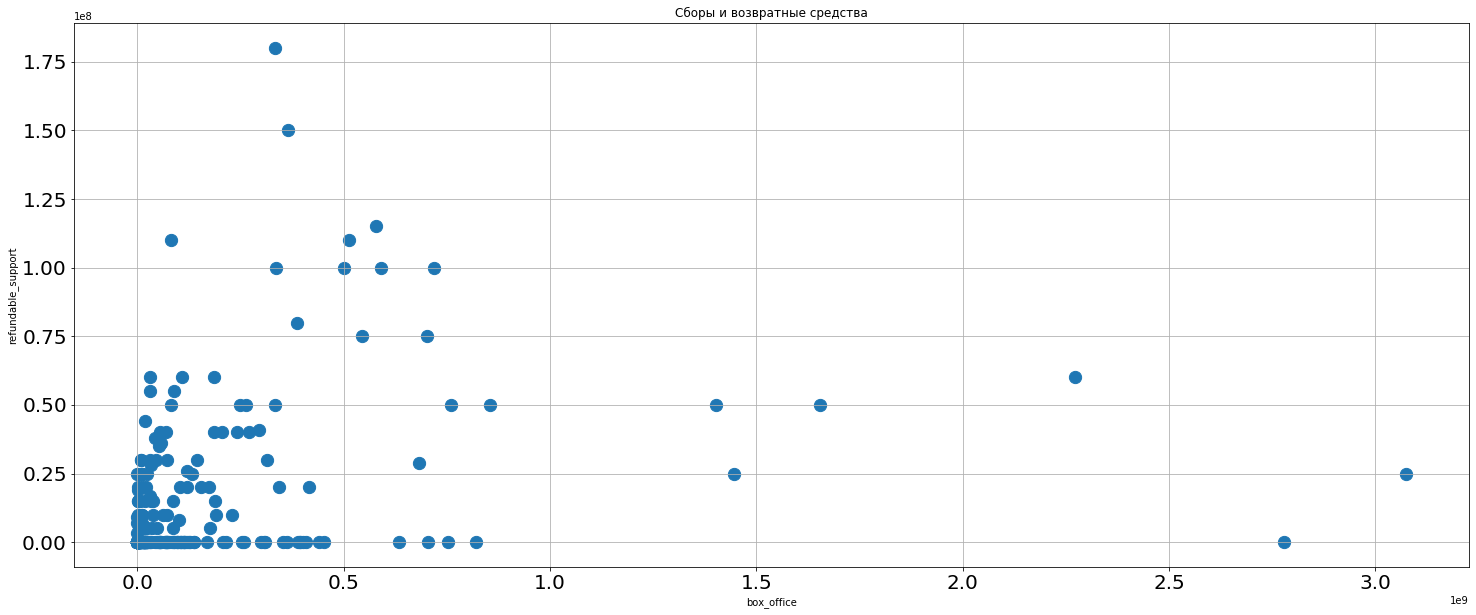

In [57]:
# Посмотрим как количесво возвратных средств связано с собираемым бюджетом
government_support.plot.scatter(x = 'box_office', 
                y = 'refundable_support', 
                title='Сборы и возвратные средства', 
                figsize=(25,10), 
                s=150, grid=True, 
                fontsize=20)

In [58]:
not_government_support = df_m[(df_m['production_country'].isin(['Россия'])) & (df_m['financing_source'] == 'not_data')].copy()
# Посомтрим средний рейтинг фильмов с поддержкой государства
print('Средний рейтинг фильмов с поддержкой государства', government_support['Nratings'].mean())
print('Средний рейтинг фильмов Без поддержки государства', not_government_support['Nratings'].mean())
# Рейтинги похожи, но без поддержки чуть выше

Средний рейтинг фильмов с поддержкой государства 6.036933797909407
Средний рейтинг фильмов Без поддержки государства 6.178836509528585


In [59]:
print('Средние сборы фильмов с поддержкой государства', government_support['box_office'].mean())
print('Средние сборы фильмов Без поддержки государства', not_government_support['box_office'].mean())
# Сборы фильмов c поддержкой государсва собирают больше денег.

Средние сборы фильмов с поддержкой государства 130698257.7061462
Средние сборы фильмов Без поддержки государства 21241661.840189476


In [60]:
print(f"Фильмов с поддержкой государства {government_support['box_office'].count()}, фильмов без поддержки государства {not_government_support['box_office'].count()}")
print(f"Процент фильмов с поддержкой государсва {government_support['box_office'].count() / not_government_support['box_office'].count():.2%}")

Фильмов с поддержкой государства 301, фильмов без поддержки государства 475
Процент фильмов с поддержкой государсва 63.37%


In [61]:
my_data_5 = pd.pivot_table(government_support,
                         index=['year'],
                         aggfunc = {
                                    'title':'count'
                                   },
                          )
my_data_6 = pd.pivot_table(not_government_support,
                         index=['year'],
                         aggfunc = {
                                    'title':'count'
                                   },
                          )
my_data_join = my_data_5.join(my_data_6,lsuffix='_support', rsuffix='_notsupport')

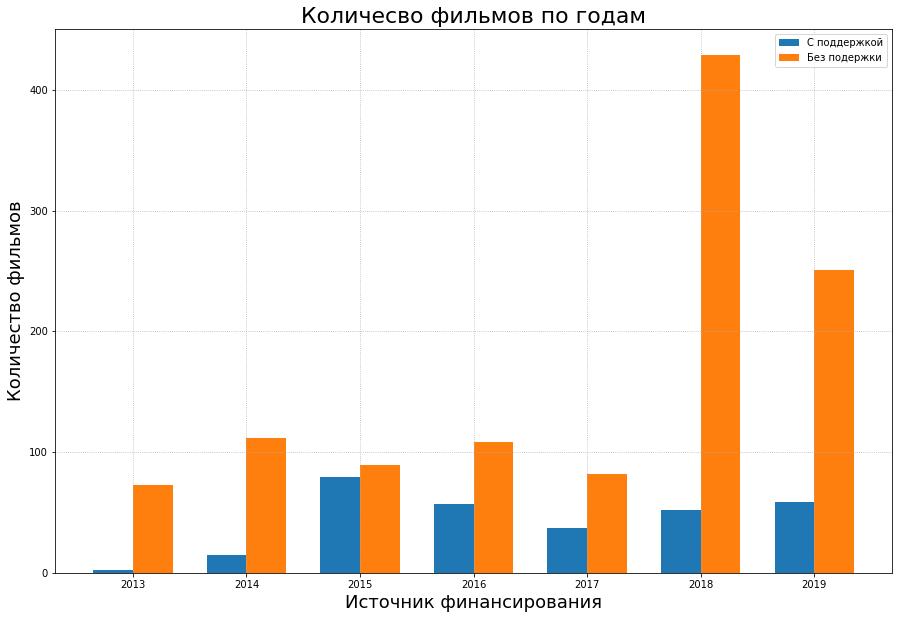

In [62]:
my_data_join['proc_suport'] = (my_data_join['title_support'] / my_data_join['title_notsupport']) * 100
my_data_join
bar_width = 0.35
plt.figure(figsize=(15,10))
plt.title('Количесво фильмов по годам', fontsize=22)
rects1 = plt.bar(my_data_join.index, my_data_join['title_support'], bar_width, label='C поддержкой')
rects2 = plt.bar(my_data_join.index + bar_width, my_data_join['title_notsupport'], bar_width, label='Без подержки')
plt.xticks(my_data_join.index + bar_width / 2, my_data_join.index)
plt.grid(linestyle=':')
plt.xlabel('Источник финансирования', fontsize=18)
plt.ylabel('Количество фильмов', fontsize=18)
plt.legend()

In [63]:
my_data_join

,title_support,title_notsupport,proc_suport
year,,,
2013,2,73,2.74
2014,15,112,13.39
2015,79,89,88.76
2016,57,108,52.78
2017,37,82,45.12
2018,52,429,12.12
2019,59,251,23.51


In [64]:
# Посмотрим в каком году выдали больще всего денег на возвратной или безвозвратной основе
my_data_7 = pd.pivot_table(government_support,
                           index=['year'],
                           aggfunc = {
                               'refundable_support':'sum',
                               'nonrefundable_support':'sum'
                           },
                          )
my_data_7
print(f"Больше всего денег выдали в {my_data_7[my_data_7['nonrefundable_support'] == my_data_7['nonrefundable_support'].max()].index[0]} году")

Больше всего денег выдали в 2019 году


In [65]:
my_data_join

,title_support,title_notsupport,proc_suport
year,,,
2013,2,73,2.74
2014,15,112,13.39
2015,79,89,88.76
2016,57,108,52.78
2017,37,82,45.12
2018,52,429,12.12
2019,59,251,23.51


In [66]:
#state_share
government_support[government_support['budget']>0].sort_values('state_share')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,Nratings,year,Ndirector,Ngenres,state_share
5595,За гранью реальности,111010817,2017-11-27 12:00:00,Художественный,"ООО ""КИНОДАНЦ""",Россия,А.Богуславский,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,...,136230333.00,Министерство культуры,5.2,"приключения,фэнтези",126713450.16,5.20,2017,А.Богуславский,приключения,0.04
3731,Танцы насмерть,111013416,2016-08-31 12:00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""ЦЕНТРОКИНО""",Россия,А.Волгин,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,...,90278063.00,Министерство культуры,4.0,фантастика,9680744.00,4.00,2016,А.Волгин,фантастика,0.07
7166,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,...,779941965.00,Министерство культуры,6.9,"драма,биография,история",54243202.71,6.90,2019,А.Михалков (псевдоним А.Кончаловский),драма,0.08
3041,Крякнутые каникулы,114003615,2015-12-22 12:00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,40000000.00,...,399075326.00,Фонд кино,5.4,"мультфильм,комедия,приключения",69693747.93,5.40,2015,В.Лакисов,мультфильм,0.10
7109,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,...,2305074303.00,Фонд кино,5.8,"приключения,фэнтези",333597059.59,5.80,2019,О.Степченко,приключения,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,Преображение (2015),111007016,2016-04-08 12:00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,«16+» - для детей старше 16 лет,0.00,...,37142857.00,Министерство культуры,5.7,ужасы,56800.00,5.70,2016,Т.Воронецкая,ужасы,0.70
2378,Экспириенс,111000315,2015-01-13 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0.00,...,37142857.00,Министерство культуры,4.7,драма,36550.00,4.70,2015,Е.Татаров,драма,0.70
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,37142857.00,Министерство культуры,NaN,not_data,28140.00,nan,2014,А.Якимчук,not_data,0.70
2537,Наследники (2015),111018515,2015-10-22 12:00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,7153119.00,...,50218741.00,"Министерство культуры, Фонд кино",6.1,"мюзикл,фэнтези,комедия",194780.00,6.10,2015,В.Хотиненко,мюзикл,0.70


### Шаг 5. Напишите общий вывод

Государство поддерживает примерно 40% российского кино. Но с 2015 года доля финансируемых фильмов уменьшается.
При этом доля дотационных фильмов составляет примерно 60% от количесва фильмов без дотаций.

* Больше всего фильмов с поддержкой вышло в 2015 году;
* Самый большой процент фильмов Российского производства вышел 2015году;
* Больше всего денег на кино выдали в 2016 году;
* Больше самые большие сборы фильмов с поддержкой были в 2015 году;
* Самая прибыльная студия ООО "Студия "ТРИТЭ" Никиты Михалкова";
* Самый прибыльный режиссер К.Шипенко.

В сренем самыми кассовыми фильмами являются фильмы с рейтингом 6+ затем фильмы для подростков 12+ и 16+, аутсайдерами среди рейтингов являются 18+ и 0+;

